<a href="https://colab.research.google.com/github/kairos310/ultrasound_classification/blob/main/ultrasound_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import re
import random
import pandas as pd

In [ ]:
# Constants
FOLDER_PATH = os.path.join("drive", "MyDrive", "ultrasound", "bin")
REGEX = '(?<=H)[0-9]*(?=_)'
DATA_SHAPE = (7500, 101)
MAX_FILES = 300  # Limit for file processing

In [ ]:
# Check if a GPU is available and configure TensorFlow to use it if available
def configure_gpu():
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        print("GPUs available:", physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    else:
        print("No GPU available.")
    #tf.debugging.set_log_device_placement(True)
configure_gpu()



GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Mounting Google Drive to access the dataset stored there
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

#folder_path = os.path.join("drive", "MyDrive", "ultrasound", "PC_LARGEST_DATASET_BIGFILES")

In [ ]:
# def load_binary():
#   for filename in folder_path:
#     filepath = os.path.join(os.getcwd() , "bin", filename)
#     img = np.memmap(filepath, dtype="float16")
#     img = img.reshape(100, 7500)
#     print(filename)

In [ ]:
# Initialize arrays to store data and labels
dataX = np.empty((33000, 4700), dtype='float16')  # Array for ultrasound images
dataY = np.empty(33000)          # Array for corresponding bone densities

def process_file(filename, folder_path, densities, i):
    file_path = os.path.join(folder_path, filename)
    img = np.memmap(file_path, dtype="float16")
    if img.shape[0] % 7500 != 0:
      return i
    img = img.reshape(7500, 100)
    bone_id = int(re.search(REGEX, filename).group(0))
    density = np.full((100,), densities[bone_id])

    dataX[i * 100: (i + 1) * 100] = img[2800:, :].T  # Storing processed data in dataX
    dataY[i * 100: (i + 1) * 100] = density  # Storing densities
    print(f"{filename} loaded")
    return i + 1

In [ ]:
# Load Data
i = 0
# Array to store bone densities
densities = [None, 0.132, None, None, 0.059, None, None, None, 0.15, None, None, None, None, None, None, 0.103, None, None, None, None, 0.071, 0.089, None, None, None, None, None, None, 0.101, None, None, None, None, 0.246, 0.105, None, 0.087, None, None, None, 0.116, None, None, None, None, 0.133, None, None, None, None, None, None, None, None, None, None, 0.107, None, 0.259, None, None, None, 0.169, None, None, None, None, None, None, None, None, 0.197, None, None, None, None, None, None, None, None, None, 0.206, None, None, None, None, None, None, 0.328, 0.477, None, None, 0.207, None, None, None, None, 0.147, None, None, None, None, None, None, 0.197, None, None, None, None, None, None, None, None, 0.161, None, None, None, None, None, None, None, None, None, 0.28, None, None, 0.11, None, None, None, None, 0.095, None, None, None, None, None, 0.077, 0.107, 0.12, None, None, 0.142, None, 0.169, None, None, None, 0.07, None, None, None, 0.151, None, None, None, None, 0.292, None, None, 0.414, None, 0.195, 0.148, None, None, 0.141, None, None, None, None, 0.113, None, None, None, None, None, None, None, 0.325, None, None, 0.11, None, None, None, None, None, None, None, None, None, None, 0.099, None, 0.317, 0.208, None, None, None, None, None, None, None, None, None, None, 0.135, None, None, None, 0.279, None, None, None, 0.178, None, None, None, 0.176, None, None, None, None, 0.291, 0.33, 0.277, None, 0.235, None, None, 0.157, None, None, None, 0.145, None, None, None, None, None, None, 0.148, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
for filename in os.listdir(FOLDER_PATH):
    #if i < MAX_FILES: # and filename.endswith('_sp') :
    i = process_file(filename, FOLDER_PATH, densities, i)

H137_D_sp.bin loaded
H131_Pr_sp.bin loaded
H113_A_sp.bin loaded
H113_D_sp.bin loaded
H113_L_sp.bin loaded
H113_M_sp.bin loaded
H113_Pr_sp.bin loaded
H113_P_sp.bin loaded
H123_A_sp.bin loaded
H123_D_sp.bin loaded
H123_L_sp.bin loaded
H123_Pr_sp.bin loaded
H123_M_sp.bin loaded
H123_P_sp.bin loaded
H126_D_sp.bin loaded
H126_A_sp.bin loaded
H126_L_sp.bin loaded
H126_M_sp.bin loaded
H126_Pr_sp.bin loaded
H131_A_sp.bin loaded
H126_P_sp.bin loaded
H131_D_sp.bin loaded
H131_L_sp.bin loaded
H131_M_sp.bin loaded
H104_A_sp.bin loaded
H104_D_sp.bin loaded
H104_L_sp.bin loaded
H104_M_sp.bin loaded
H104_Pr_sp.bin loaded
H104_P_sp.bin loaded
H139_D_sp.bin loaded
H139_L_sp.bin loaded
H139_M_sp.bin loaded
H139_Pr_sp.bin loaded
H139_P_sp.bin loaded
H142_A_sp.bin loaded
H142_D_sp.bin loaded
H142_L_sp.bin loaded
H142_M_sp.bin loaded
H142_Pr_sp.bin loaded
H142_P_sp.bin loaded
H144_A_sp.bin loaded
H144_D_sp.bin loaded
H144_L_sp.bin loaded
H144_M_sp.bin loaded
H144_Pr_sp.bin loaded
H144_P_sp.bin loaded
H148_

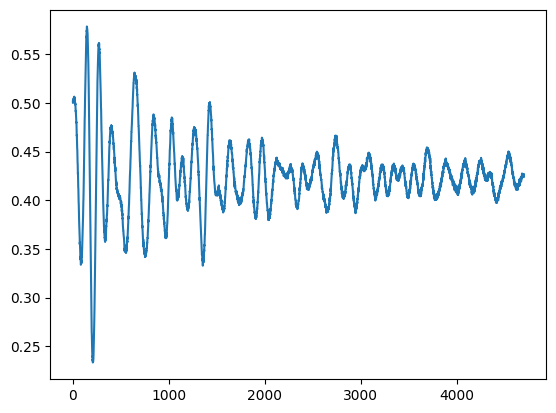

In [ ]:
plt.plot(dataX[100])
plt.show()

In [ ]:
# Function to create a TensorFlow Dataset from the provided data
def create_dataset(data_x, data_y, batch_size, shuffle_buffer):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices((data_x, data_y))
    dataset = dataset.shuffle(buffer_size=shuffle_buffer)
  # j = 0
  # for x, y in dataset:
  #     j += 1
  #     print(x.numpy(), y.numpy())
    dataset = dataset.batch(10).prefetch(1)
    return dataset


In [ ]:
# Normalizing the label data
dataY_norm = dataY - dataY.min()
dataY_norm = dataY_norm/ dataY_norm.max()

In [ ]:
data_full = np.concatenate((dataX, np.expand_dims(dataY_norm, 1)), axis=1)
np.random.shuffle(data_full)


In [ ]:
dataX = data_full[:, :-1]
dataY_norm = data_full[:, -1]

In [ ]:
# Splitting data into training, validation, and test sets
SIZE = len(dataX)
TSPLIT = SIZE // 200
VSPLIT = SIZE // 100 + TSPLIT

x_train = np.array(dataX[:-VSPLIT], dtype=float)
y_train = np.array(dataY_norm[:-VSPLIT], dtype=float)

x_val = np.array(dataX[-VSPLIT:-TSPLIT], dtype=float)
y_val = np.array(dataY_norm[-VSPLIT:-TSPLIT], dtype=float)

x_test = np.array(dataX[-TSPLIT:], dtype=float)
y_test = np.array(dataY_norm[-TSPLIT:], dtype=float)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(32505, 4700)
(32505,)
(330, 4700)
(330,)
(165, 4700)
(165,)


In [ ]:
# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

In [ ]:
# Creating datasets for training and validation
dataset = create_dataset(x_train, y_train, 30, x_train.shape[0])
val_dataset = create_dataset(x_val, y_val, 30, x_val.shape[0])


# Building the neural network model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((4700, 1), input_shape=(4700,)),
        tf.keras.layers.Conv1D(32, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    # Compiling the model with optimizer, loss function, and metrics
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()





In [ ]:
# clear memory

import gc

del data_full
del x_train
del y_train
del x_val
del y_val

gc.collect()

6770

In [ ]:

# Training the model with the training dataset
# Model Training
history = model.fit(dataset, epochs = 30, verbose=2, validation_data=val_dataset,callbacks=[GarbageCollectorCallback()])

Epoch 1/30
3251/3251 - 18s - loss: 0.0413 - mae: 0.1580 - val_loss: 0.0412 - val_mae: 0.1515 - 18s/epoch - 6ms/step
Epoch 2/30
3251/3251 - 15s - loss: 0.0408 - mae: 0.1575 - val_loss: 0.0406 - val_mae: 0.1550 - 15s/epoch - 5ms/step
Epoch 3/30
3251/3251 - 15s - loss: 0.0407 - mae: 0.1572 - val_loss: 0.0421 - val_mae: 0.1501 - 15s/epoch - 5ms/step
Epoch 4/30
3251/3251 - 16s - loss: 0.0407 - mae: 0.1573 - val_loss: 0.0408 - val_mae: 0.1529 - 16s/epoch - 5ms/step
Epoch 5/30
3251/3251 - 15s - loss: 0.0407 - mae: 0.1573 - val_loss: 0.0411 - val_mae: 0.1514 - 15s/epoch - 5ms/step
Epoch 6/30
3251/3251 - 16s - loss: 0.0407 - mae: 0.1573 - val_loss: 0.0405 - val_mae: 0.1588 - 16s/epoch - 5ms/step
Epoch 7/30
3251/3251 - 16s - loss: 0.0406 - mae: 0.1572 - val_loss: 0.0405 - val_mae: 0.1578 - 16s/epoch - 5ms/step
Epoch 8/30
3251/3251 - 18s - loss: 0.0406 - mae: 0.1571 - val_loss: 0.0406 - val_mae: 0.1593 - 18s/epoch - 5ms/step
Epoch 9/30
3251/3251 - 17s - loss: 0.0406 - mae: 0.1573 - val_loss: 0.04

33/33 - 0s - loss: 0.0405 - mae: 0.1553 - 100ms/epoch - 3ms/step


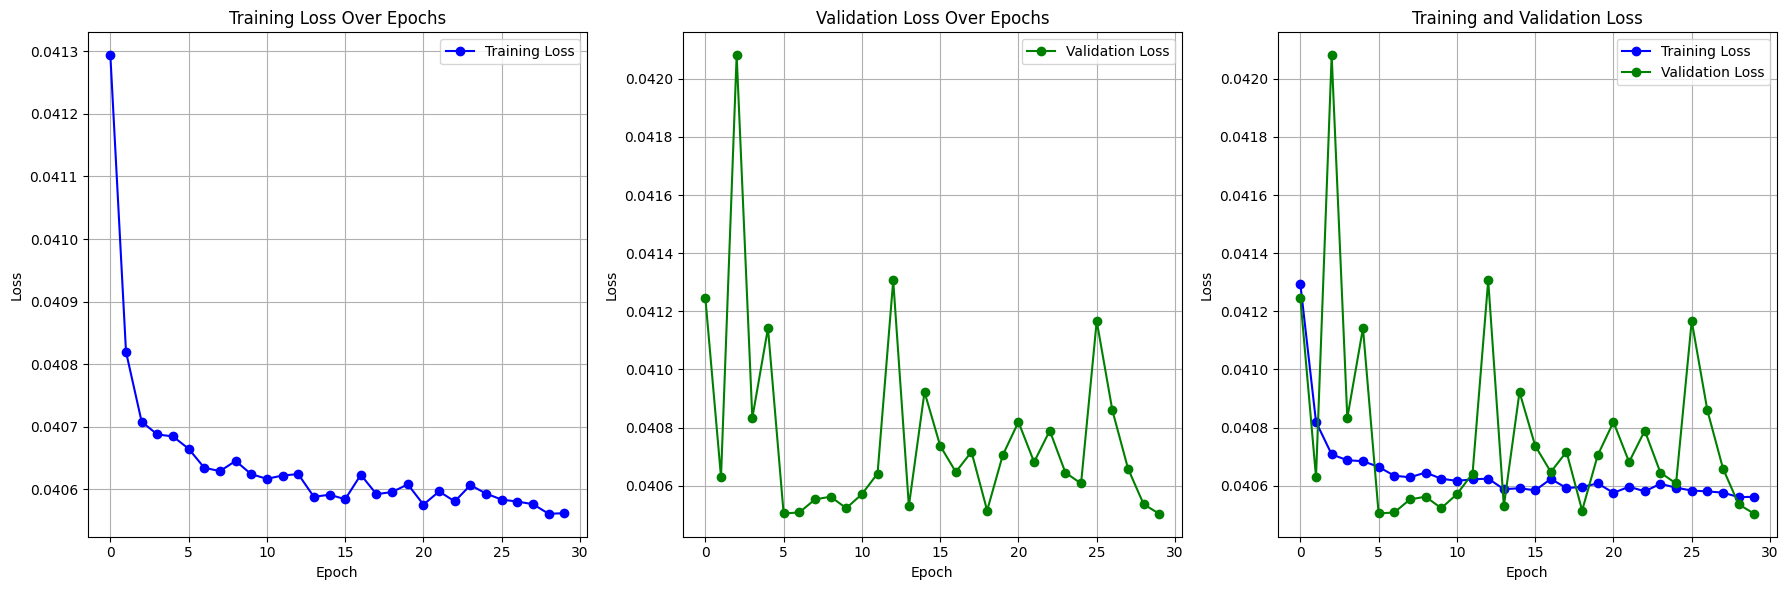

In [ ]:
# Evaluate the model on the test set to get test loss and accuracy
test_loss, test_acc = model.evaluate(val_dataset, verbose=2)

# Create a figure for the plots
plt.figure(figsize=(18, 6))

# Plot Training Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot Validation Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='green', marker='o')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot Training and Validation Loss Together
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green', marker='o')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Displaying model summary
model.summary(show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 reshape (Reshape)           (None, 4700, 1)           0         Y          
                                                                            
 conv1d (Conv1D)             (None, 4696, 32)          192       Y          
                                                                            
 max_pooling1d (MaxPooling1  (None, 2348, 32)          0         Y          
 D)                                                                         
                                                                            
 dense (Dense)               (None, 2348, 32)          1056      Y          
                                                                            
 dense_1 (Dense)             (None, 2348, 16)          528       Y          
                                                        

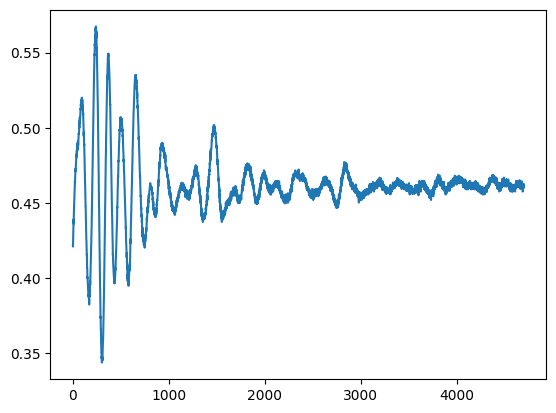

In [ ]:
plt.plot(x_test[0])
plt.show()

In [ ]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# Shuffle the test data and make predictions
shuf_test = np.hstack([x_test, np.expand_dims(y_test, 1)])
print(shuf_test.shape)
np.random.shuffle(shuf_test)
# for i in range(10):
#   index = random.randint(0, x_test.shape[0])
#   shuf_test = x_test[index]
pred_x = shuf_test[:, :-1]
print(pred_x)
pred = model.predict(pred_x)
print(pred)
print(shuf_test[:10,-1])

6/6 - 0s - loss: 0.0462 - mae: 0.1673 - 272ms/epoch - 45ms/step
(165, 4701)
[[0.34838867 0.35327148 0.35424805 ... 0.41967773 0.41625977 0.41748047]
 [0.44091797 0.43725586 0.4387207  ... 0.45678711 0.453125   0.45654297]
 [0.45263672 0.4519043  0.45141602 ... 0.45849609 0.45800781 0.46020508]
 ...
 [0.58740234 0.58496094 0.58349609 ... 0.4675293  0.46630859 0.46777344]
 [0.46142578 0.46459961 0.46166992 ... 0.45166016 0.45141602 0.45336914]
 [0.41796875 0.42114258 0.42285156 ... 0.43017578 0.42919922 0.43139648]]
6/6 [==============================] - 0s 4ms/step
[[[0.3677551 ]
  [0.36780876]
  [0.3679497 ]
  ...
  [0.37079573]
  [0.37079573]
  [0.37079573]]

 [[0.37079573]
  [0.37079573]
  [0.37079573]
  ...
  [0.37079573]
  [0.37079573]
  [0.37079573]]

 [[0.37079573]
  [0.37079573]
  [0.37079573]
  ...
  [0.37079573]
  [0.37079573]
  [0.37079573]]

 ...

 [[0.37079573]
  [0.37079573]
  [0.37079573]
  ...
  [0.37079573]
  [0.37079573]
  [0.37079573]]

 [[0.37079573]
  [0.37079573]
 

In [ ]:

#temp = np.genfromtxt("densities.tsv", delimiter="\t", usemask=True, dtype="float16")
#densities = [None for i in range(300)]
#for i, d in temp:
    #densities[int(i)] = d